# Data Augmented

## Data 2224

In [1]:
!pip install imblearn

     |████████████████████████████████| 199 kB 617 kB/s eta 0:00:01
     |████████████████████████████████| 30.8 MB 11.4 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0
    Uninstalling scikit-learn-1.0:
      Successfully uninstalled scikit-learn-1.0


In [2]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [3]:
#All import go here
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#Get and describe data
path = '/home/workspace/files/aryan/Results/data_2224.csv'
df = pd.read_csv(path)
df = df[df['Result']!='Neutral']

In [8]:
#Check for the categories in each variable which don't contribute much of the total fraction
var_with_more_categories = ['Immigration Status', 'Nationality', 'Marital Status', 'Religion', 'Economic Status', 'Scheme']
for vari in var_with_more_categories:
    print(df.value_counts(vari))
    print("\n\n")

Results appear here!


In [9]:
# Replace the categories with less than 5 occurence
df1 = df.copy(deep=True)
for vari in var_with_more_categories:
    series = pd.value_counts(df1[vari])
    mask = (series/series.sum() * 100).lt(0.5)
    # To replace df['column'] use np.where I.e 
    df1[vari] = np.where(df1[vari].isin(series[mask].index),'fill',df1[vari])

In [10]:
#Print and chekc the replaced values
for vari in var_with_more_categories:
    print(df1.value_counts(vari))
    print("\n\n")

Results printed here!


In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert target label to numerical Data
le = LabelEncoder()
df1['Result'] = le.fit_transform(df1['Result'])
print(df1['Result'].value_counts())
#Separate training features from target
X = df1.drop(['Result'], axis=1)
y = df1['Result']


####### 
#Train dataset = X
#Test Dataset = y
########
#Drop the client number column 
X = X.drop(['Client Number','Num Sessions','Time per Session'],1)

# Convert the following numerical labels from interger to float
#float_array = X[["Time per Session", "Num Sessions", "Age at Start"]].values.astype(float)

# categorical features to be converted to One Hot Encoding
categ = ['Gender', 'Immigration Status','Age at Start','Nationality', 'Religion',
       'Marital Status','EET status', 'Sexual Orientation', 'Economic Status', 'Service Type', 'Area','Scheme']
    
# One Hot Encoding conversion
X = pd.get_dummies(X, prefix_sep="_", columns=categ)

1    1739
0     281
Name: Result, dtype: int64


## Data 3041

In [149]:
#All import go here
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [150]:
#Get and describe data
path = '/home/workspace/files/aryan/Results/data_3041acc_Eco_NN.csv'
df = pd.read_csv(path)
df = df[df['Result']!='Neutral']
#Drop these columns
to_drop = ['Client Number','Salary/Income','Please List any Medications/Allergies','Communication/Language Barriers','Mental Health/Learning Disabilities',
           'Is An Interpreter required','If Yes, please specify',
           'Last Settled Address From:','Last Settled Address To:','If current accommodation is not the main applicants last settled home, Please describe the accommodation when last settled:',
          'A2','B2','If Yes, what is the expected due by date','E1','E2','F1','F2','F3','G2','G From','G To','H2','H From',
          'H To','H3','I1','I2','J1','Minutes Direct','Minutes InDirect', 'Age at Start']
df = df.drop(to_drop,1)
df.rename(columns = {'Do They Have Any Medical Issues':'Medical Issue',
                     'Is An Interpreter required':'Intrptr Reqd',
                     'Does the YP have a local Connection':'Local Connection',
                     'Accommodation Type (Tenure at time of application)':'Acc Type prev'}, inplace = True)
df.nunique()

Gender                             3
Frequency                          4
Immigration Status                20
Nationality                       14
Medical Issue                      2
Local Connection                   3
Acc Type prev                     23
A1                                 3
B1                                 5
C1                                 4
D1                                 3
G1                                 3
H1                                 3
Full Assessment of Eligibility     4
L1                                 3
Marital Status                     9
Sexual Orientation                 5
Religion                          14
Economic Status                   25
EET status                         3
Service Type                       4
Area                               7
Scheme                            49
Result                             2
dtype: int64

In [151]:
# Replace the categories with less than 5 occurence
df1 = df.copy(deep=True)
for vari in var_with_more_categories:
    series = pd.value_counts(df1[vari])
    mask = (series/series.sum() * 100).lt(1)
    # To replace df['column'] use np.where I.e 
    df1[vari] = np.where(df1[vari].isin(series[mask].index),'fill',df1[vari])

In [159]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Convert target label to numerical Data
le = LabelEncoder()
df1['Result'] = le.fit_transform(df1['Result'])
print(df1['Result'].value_counts())
#Separate training features from target
X = df1.drop(['Result'], axis=1)
y = df1['Result']

df_temp = df1[['Gender', 'Immigration Status','Nationality','Marital Status','EET status', 'Sexual Orientation', 'Economic Status', 'Service Type', 'Area','Scheme']]

####### 
#Train dataset = X
#Test Dataset = y
########
       
# Convert the following numerical labels from interger to float
#float_array = X[["Time per Session", "Num Sessions", "Age at Start"]].values.astype(float)

# categorical features to be converted to One Hot Encoding
categ = ['Gender', 'Frequency', 'Immigration Status', 'Nationality',
       'Medical Issue', 'Local Connection', 'Acc Type prev', 'A1', 'B1', 'C1',
       'D1', 'G1', 'H1', 'Full Assessment of Eligibility', 'L1',
       'Marital Status', 'Sexual Orientation', 'Religion', 'Economic Status',
       'EET status', 'Service Type', 'Area', 'Scheme']
categ1 = ['Gender', 'Immigration Status','Nationality','Marital Status','EET status', 'Sexual Orientation', 'Economic Status', 'Service Type', 'Area','Scheme']
# One Hot Encoding conversion
X = pd.get_dummies(df_temp, prefix_sep="_", columns=categ1)

    
# scale our data 
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

1    2315
0     430
Name: Result, dtype: int64


### Train Test Split

In [8]:
#Now split the data into train and test Split 
seed = 999
X_Train, X_val, y_Train, y_val = train_test_split(X, y, stratify = y, test_size = 0.2, random_state=seed)

In [9]:
y_Train.value_counts()

1    1391
0     225
Name: Result, dtype: int64

### SMOTE 

In [34]:
over = SMOTE(sampling_strategy=0.7, k_neighbors=4, random_state=11)
under = RandomUnderSampler(sampling_strategy=1, random_state = 11)
steps = [('over', over), ('under', under)]
X1,y1= Pipeline(steps=steps).fit_resample(X_Train,y_Train)
print(y1.value_counts())

0    973
1    973
Name: Result, dtype: int64


### Borderline SMOTE

In [37]:
from imblearn.over_sampling import BorderlineSMOTE
oversample = BorderlineSMOTE()
X1, y1 = oversample.fit_resample(X_Train, y_Train)

In [38]:
print(y1.value_counts())
print(y_val.value_counts())

1    1391
0    1391
Name: Result, dtype: int64
1    348
0     56
Name: Result, dtype: int64


### Borderline SMOTE with SVM

In [40]:
from imblearn.over_sampling import SVMSMOTE

oversample = SVMSMOTE()
X1, y1 = oversample.fit_resample(X_Train, y_Train)

In [41]:
y1.value_counts()

1    1391
0    1391
Name: Result, dtype: int64

### ADASYN

In [31]:
from imblearn.over_sampling import ADASYN

oversample = ADASYN()
X1,y1 = oversample.fit_resample(X_Train, y_Train)

## Training the model  

### Random Forest with balanced weights

In [14]:
#Training the final Random forest model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report


def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

#this loop is used for fixing the weights in the random forest model
for i in np.arange(0.1,1,0.01):
    model = RandomForestClassifier(class_weight='balanced', random_state=seed)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=seed)
    scores1 = cross_val_score(model, X1,y1, scoring='f1_macro', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(model, X1,y1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = np.mean(scores1)
    scores2 = np.mean(scores2)
    model = model.fit(X1, y1)
    print("Cross- Validation:")
    print("F1_macro Score:{}  Accuracy:{}\n\n\n".format(scores1, scores2))
    
    y_pred = model.predict(X_val)
    print("The External test results are as follows:")
    print(classification_report(y_val, y_pred))
    break
model_rf = model

Cross- Validation:
F1_macro Score:0.882051481830334  Accuracy:0.8821536703798913



The External test results are as follows:
              precision    recall  f1-score   support

           0       0.38      0.34      0.36        56
           1       0.90      0.91      0.90       348

    accuracy                           0.83       404
   macro avg       0.64      0.63      0.63       404
weighted avg       0.82      0.83      0.83       404



In [237]:
# Do the Threshold tunign and check for the possible result we can get at any threshold

yhat = model.predict_proba(X_val)
# keep probabilities for the positive outcome only
probs = yhat[:, 1]
# define thresholds
thresholds = np.arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(probs, t), average='macro') for t in thresholds]

# get best threshold
ix = np.argmax(scores)

max_score_on_val = scores[ix]
#final_model_RF = model
y_pred = np.zeros((len(X_val),1), np.uint8)
for j in range(len(X_val)):
    y_pred[j] = to_labels(probs[j], thresholds[ix])
confusion = confusion_matrix(y_val, y_pred)
print("After Threshold Tuning, results are:\n")
print('F1_macro:%.3f Threshold=%.2f' % (scores[ix],thresholds[ix]))
print("\n\n")
print("The confusion matrix for maxium score is :")
print(confusion)

After Threshold Tuning, results are:

F1_macro:0.631 Threshold=0.62



The confusion matrix for maxium score is :
[[ 26  30]
 [ 53 295]]


### Random Forest ( Train and Test with different class weights )

In [303]:
max_score = 0.0
#this loop is used for fixing the weights in the random forest model
for i in np.arange(0.5,1,0.1):
    model = RandomForestClassifier(class_weight={0:i,1:(1-i)}, random_state=seed)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=seed)
    scores1 = cross_val_score(model, X1,y1, scoring='f1_macro', cv=cv, n_jobs=-1)
    scores2 = cross_val_score(model, X1,y1, scoring='accuracy', cv=cv, n_jobs=-1)
    scores1 = np.mean(scores1)
    scores2 = np.mean(scores2)
    if(scores1>max_score):
        max_score= scores1
        model = model.fit(X1, y1)
        print("Cross- Validation:")
        print("0_weight:{}  F1_macro Score:{}  Accuracy:{}\n".format(i, scores1, scores2))
model_rf_weighted = model

Cross- Validation:
0_weight:0.5  F1_macro Score:0.9170467797183293  Accuracy:0.9170857927661462

Cross- Validation:
0_weight:0.6  F1_macro Score:0.9182549370405702  Accuracy:0.9182850488011745

Cross- Validation:
0_weight:0.8999999999999999  F1_macro Score:0.9201892606881664  Accuracy:0.9202000697467162



In [239]:
# Do the Threshold tunign and check for the possible result we can get at any threshold
model = RandomForestClassifier(class_weight={0:0.9,1:0.1}, random_state=seed)
model = model.fit(X1, y1)
yhat = model.predict_proba(X_val)
# keep probabilities for the positive outcome only
probs = yhat[:, 1]
# define thresholds
thresholds = np.arange(0, 1, 0.0001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(probs, t), average='macro') for t in thresholds]

# get best threshold
ix = np.argmax(scores)

max_score_on_val = scores[ix]
#final_model_RF = model
y_pred = np.zeros((len(X_val),1), np.uint8)
for j in range(len(X_val)):
    y_pred[j] = to_labels(probs[j], thresholds[ix])
confusion = confusion_matrix(y_val, y_pred)
print("After Threshold Tuning, results are:\n")
print('F1_macro:%.3f Threshold=%.2f' % (scores[ix],thresholds[ix]))
print("\n\n")
print("The confusion matrix for maxium score is :")
print(confusion)
print(classification_report(y_val, y_pred))

After Threshold Tuning, results are:

F1_macro:0.661 Threshold=0.49



The confusion matrix for maxium score is :
[[ 22  34]
 [ 29 319]]
              precision    recall  f1-score   support

           0       0.43      0.39      0.41        56
           1       0.90      0.92      0.91       348

    accuracy                           0.84       404
   macro avg       0.67      0.65      0.66       404
weighted avg       0.84      0.84      0.84       404



### XG Boost 

In [15]:
!pip install xgboost

     |████████████████████████████████| 192.9 MB 252 kB/s  eta 0:00:01


In [26]:
# Trainign teh XGBoost model
from xgboost import XGBClassifier

from sklearn.metrics import f1_score

X1.rename( columns={'Economic Status_Part Time Work (<30 hrs)':'Economic Status_Part Time Work lt 30 hrs' } ,inplace=True) 
X_val.rename( columns={'Economic Status_Part Time Work (<30 hrs)':'Economic Status_Part Time Work lt 30 hrs' } ,inplace=True) 


def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

max_score_on_val = 0.0


for j in np.arange(1,10,1):
    model = XGBClassifier(scale_pos_weight=1, random_state =99)
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=12)
    scores = cross_val_score(model, X1,y1, scoring='f1_macro', cv=cv, n_jobs=-1)
    score = np.mean(scores)
    model = model.fit(X1, y1)
    print("j{} F1 Score:{}".format(j,score))

    yhat = model.predict_proba(X_val)
    # keep probabilities for the positive outcome only
    probs = yhat[:, 1]
    # define thresholds
    thresholds = np.arange(0, 1, 0.001)
    # evaluate each threshold
    scores = [f1_score(y_val, to_labels(probs, t), average='macro') for t in thresholds]
    # get best threshold
    ix = np.argmax(scores)
    if(scores[ix]>max_score_on_val):
        print('Weight:%.2f F1:%.3f    Threshold=%.2f, VafF1=%.4f' % (j,score, thresholds[ix], scores[ix]))
        max_score_on_val = scores[ix]
        final_model_XGB = model
    break
model_xg = model

j1 F1 Score:0.91176023513521
Weight:1.00 F1:0.912    Threshold=0.70, VafF1=0.6451


In [27]:
# Do the Threshold tunign and check for the possible result we can get at any threshold

yhat = final_model_XGB.predict_proba(X_val)
# keep probabilities for the positive outcome only
probs = yhat[:, 1]
# define thresholds
thresholds = np.arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(probs, t), average='macro') for t in thresholds]

# get best threshold
ix = np.argmax(scores)

max_score_on_val = scores[ix]
#final_model_RF = model
y_pred = np.zeros((len(X_val),1), np.uint8)
for j in range(len(X_val)):
    y_pred[j] = to_labels(probs[j], thresholds[ix])
confusion = confusion_matrix(y_val, y_pred)
print("After Threshold Tuning, results are:\n")
print('F1_macro:%.3f Threshold=%.2f' % (scores[ix],thresholds[ix]))
print("\n\n")
print("The confusion matrix for maxium score is :")
print(confusion)
print(classification_report(y_val, y_pred))

After Threshold Tuning, results are:

F1_macro:0.645 Threshold=0.70



The confusion matrix for maxium score is :
[[ 25  31]
 [ 44 304]]
              precision    recall  f1-score   support

           0       0.36      0.45      0.40        56
           1       0.91      0.87      0.89       348

    accuracy                           0.81       404
   macro avg       0.63      0.66      0.65       404
weighted avg       0.83      0.81      0.82       404



### Plotting the AUC for each model

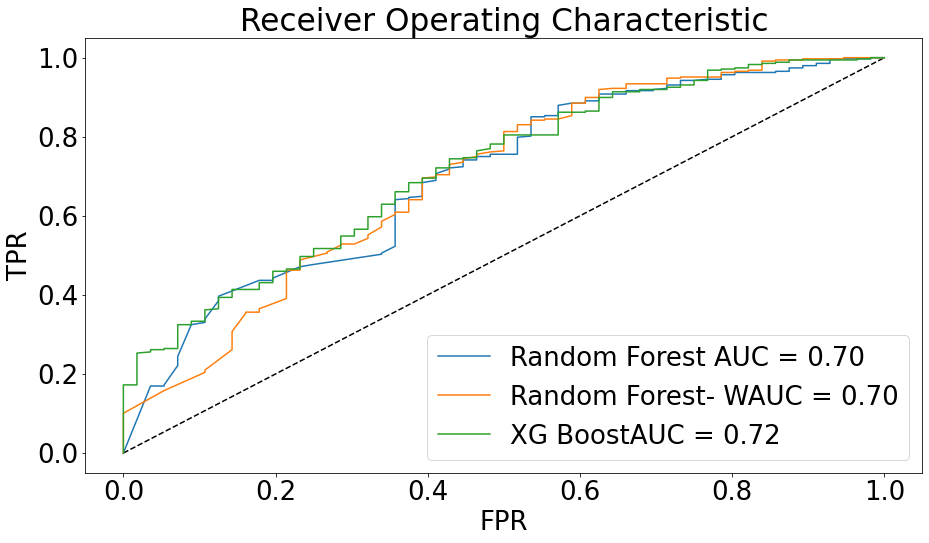

In [305]:
#ROC Curve
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
from sklearn.metrics import auc

y_pred_prob1 = model_rf.predict_proba(X_val)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_val, y_pred_prob1)
roc_auc1 = auc(fpr1, tpr1)

y_pred_prob2 = model_xg_weighted.predict_proba(X_val)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_val, y_pred_prob2)
roc_auc2 = auc(fpr2, tpr2)


y_pred_prob3 = model_xg.predict_proba(X_val)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_val, y_pred_prob3)
roc_auc3 = auc(fpr3, tpr3)


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Random Forest "+'AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, label= "Random Forest- W"+'AUC = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, label= "XG Boost"+'AUC = %0.2f' % roc_auc3)
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams.update({'font.size': 26})



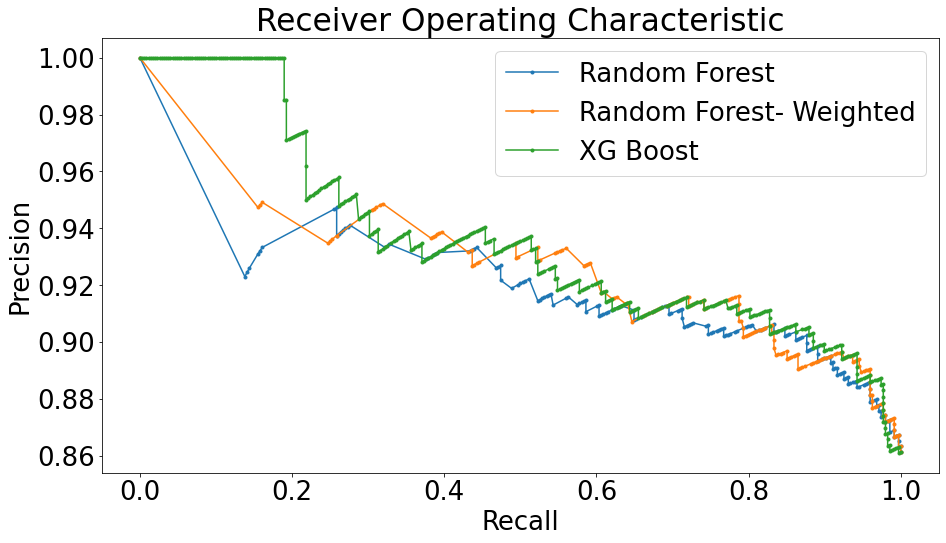

In [285]:
#ROC Curve
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt


y_pred_prob1 = model_rf.predict_proba(X_val)[:,1]
p1 , r1, thresholds1 = precision_recall_curve(y_val, y_pred_prob1)

y_pred_prob2 = model_rf_weighted.predict_proba(X_val)[:,1]
p2 , r2, thresholds1 = precision_recall_curve(y_val, y_pred_prob2)


y_pred_prob3 = model_xg.predict_proba(X_val)[:,1]
p3 , r3, thresholds1 = precision_recall_curve(y_val, y_pred_prob3)


plt.plot(r1, p1,marker='.', label= "Random Forest")
plt.plot(r2, p2,marker='.', label= "Random Forest- Weighted")
plt.plot(r3, p3,marker='.', label= "XG Boost")
plt.legend()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title('Receiver Operating Characteristic')
plt.show()
plt.rcParams["figure.figsize"] = (15,8)
plt.rcParams.update({'font.size': 26})

### Neural Network

In [15]:
!pip install tensorflow
!pip install scikeras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

     |████████████████████████████████| 511.7 MB 5.4 kB/s  eta 0:00:01     |████████████▏                   | 195.5 MB 12.4 MB/s eta 0:00:26     |████████████████████████        | 382.1 MB 14.2 MB/s eta 0:00:10     |██████████████████████████████▋ | 488.8 MB 12.4 MB/s eta 0:00:02     |███████████████████████████████▊| 507.4 MB 14.8 MB/s eta 0:00:01
     |████████████████████████████████| 4.5 MB 67.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 15.5 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 12.4 MB/s eta 0:00:01
     |████████████████████████████████| 438 kB 17.6 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 12.1 MB/s eta 0:00:01
     |████████████████████████████████| 123 kB 17.4 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 10.7 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 9.4 MB/s  eta 0:00:01
     |██████████████████████████

2022-07-14 15:13:55.343572: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/jre/lib/amd64/server/:
2022-07-14 15:13:55.343614: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [109]:
def create_baseline():
    # create model
    model = Sequential()
    model.add(Dense(8, input_shape=(112,), activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    return model

In [110]:
print(y1.value_counts())
print(y_val.value_counts())

1    1391
0    1391
Name: Result, dtype: int64
1    348
0     56
Name: Result, dtype: int64


In [111]:
from tensorflow.keras.metrics import TrueNegatives
from tensorflow.keras.metrics import TruePositives

model=create_baseline()
model.compile(loss='binary_crossentropy',optimizer='nadam', metrics=['accuracy'])
model.fit(X1, y1,epochs=100, validation_split=0.2,batch_size=3, verbose=1, class_weight={0:0.8,1:0.2})

Epoch 1/100
742/742 [==============================] - 5s 4ms/step - loss: 0.3890 - accuracy: 0.8710 - val_loss: 0.0301 - val_accuracy: 0.9767
Epoch 2/100
742/742 [==============================] - 3s 3ms/step - loss: 0.3321 - accuracy: 0.8804 - val_loss: 0.0344 - val_accuracy: 0.9659
Epoch 3/100
742/742 [==============================] - 3s 3ms/step - loss: 0.2827 - accuracy: 0.8867 - val_loss: 0.0356 - val_accuracy: 0.9695
Epoch 4/100
742/742 [==============================] - 3s 3ms/step - loss: 0.2720 - accuracy: 0.8912 - val_loss: 0.0488 - val_accuracy: 0.9605
Epoch 5/100
742/742 [==============================] - 3s 3ms/step - loss: 0.2595 - accuracy: 0.8948 - val_loss: 0.0289 - val_accuracy: 0.9767
Epoch 6/100
742/742 [==============================] - 3s 3ms/step - loss: 0.2630 - accuracy: 0.8935 - val_loss: 0.0280 - val_accuracy: 0.9731
Epoch 7/100
742/742 [==============================] - 3s 3ms/step - loss: 0.2442 - accuracy: 0.8930 - val_loss: 0.0391 - val_accuracy: 0.9659

Epoch 58/100
742/742 [==============================] - 3s 3ms/step - loss: 0.1351 - accuracy: 0.9407 - val_loss: 0.0243 - val_accuracy: 0.9731
Epoch 59/100
742/742 [==============================] - 3s 3ms/step - loss: 0.1470 - accuracy: 0.9357 - val_loss: 0.0249 - val_accuracy: 0.9713
Epoch 60/100
742/742 [==============================] - 3s 3ms/step - loss: 0.1365 - accuracy: 0.9402 - val_loss: 0.0206 - val_accuracy: 0.9982
Epoch 61/100
742/742 [==============================] - 3s 3ms/step - loss: 0.1287 - accuracy: 0.9497 - val_loss: 0.0189 - val_accuracy: 1.0000
Epoch 62/100
742/742 [==============================] - 3s 3ms/step - loss: 0.1306 - accuracy: 0.9492 - val_loss: 0.0241 - val_accuracy: 0.9713
Epoch 63/100
742/742 [==============================] - 3s 3ms/step - loss: 0.1271 - accuracy: 0.9465 - val_loss: 0.0108 - val_accuracy: 1.0000
Epoch 64/100
742/742 [==============================] - 3s 3ms/step - loss: 0.1428 - accuracy: 0.9348 - val_loss: 0.0205 - val_accuracy:

In [112]:
y_pred = model.predict(X_val)

score = model.evaluate(X_val, y_val,verbose=1)
print(score)

13/13 [==============================] - 0s 1ms/step - loss: 1.8483 - accuracy: 0.7921
[1.848253607749939, 0.7920792102813721]


In [113]:
# Do the Threshold tunign and check for the possible result we can get at any threshold
yhat = model.predict(X_val)
# keep probabilities for the positive outcome only
probs = yhat[:]
# define thresholds
thresholds = np.arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(probs, t), average='macro') for t in thresholds]

# get best threshold
ix = np.argmax(scores)

max_score_on_val = scores[ix]
#final_model_RF = model
y_pred = np.zeros((len(X_val),1), np.uint8)
for j in range(len(X_val)):
    y_pred[j] = to_labels(probs[j], thresholds[ix])
confusion = confusion_matrix(y_val, y_pred)
print("After Threshold Tuning, results are:\n")
print('F1_macro:%.3f Threshold=%.2f' % (scores[ix],thresholds[ix]))
print("\n\n")
print("The confusion matrix for maxium score is :")
print(confusion)

13/13 [==============================] - 0s 1ms/step
After Threshold Tuning, results are:

F1_macro:0.595 Threshold=0.67



The confusion matrix for maxium score is :
[[ 19  37]
 [ 47 301]]


In [114]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.34      0.31        56
           1       0.89      0.86      0.88       348

    accuracy                           0.79       404
   macro avg       0.59      0.60      0.59       404
weighted avg       0.81      0.79      0.80       404



### Performing Nested Cross Validation (Grid Search)

In [36]:
!pip install nested-cv

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

cv_outer = StratifiedKFold(n_splits=7, shuffle=True, random_state=1)
# enumerate splits
outer_results = list()
outer_results_f1 = list()
for (i,(train_index, test_index)) in enumerate(cv_outer.split(X1,y1)):
    # split data
    X_train_outer, X_test_outer = X1.iloc[train_index], X1.iloc[test_index]
    y_train_outer, y_test_outer = y1.iloc[train_index], y1.iloc[test_index]
    
    # configure the cross-validation procedure
    cv_inner = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    # define the model
    model = RandomForestClassifier(criterion='log_loss',random_state=1)
    # define search space
    space = dict()
    space['n_estimators'] = [500,1000]
    space['min_samples_split'] = [10,20,28]
    space['class_weight'] = ['balanced',{0:0.6,1:0.4},{0:0.7,1:0.3}]
    
    # define search
    search = GridSearchCV(model, space, scoring='f1_macro', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(X_train_outer, y_train_outer)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test_outer)
    # evaluate the model
    acc = accuracy_score(y_test_outer, yhat)
    acc_f1=f1_score(y_test_outer, yhat, average='macro')
    # store the result
    outer_results.append(acc)
    outer_results_f1.append(acc_f1)
    
    # report progress
    print('>acc=%.3f, F1_macro=%.f est=%.3f, cfg=%s' % (acc, acc_f1, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (np.mean(outer_results), np.std(outer_results)))
print('F1_macro: %.3f (%.3f)' % (np.mean(outer_results_f1), np.std(outer_results_f1)))

>acc=0.940, F1_macro=1 est=0.912, cfg={'class_weight': 'balanced', 'min_samples_split': 10, 'n_estimators': 500}
>acc=0.897, F1_macro=1 est=0.922, cfg={'class_weight': 'balanced', 'min_samples_split': 10, 'n_estimators': 1000}
>acc=0.930, F1_macro=1 est=0.907, cfg={'class_weight': 'balanced', 'min_samples_split': 10, 'n_estimators': 500}
>acc=0.917, F1_macro=1 est=0.915, cfg={'class_weight': {0: 0.6, 1: 0.4}, 'min_samples_split': 10, 'n_estimators': 500}
>acc=0.917, F1_macro=1 est=0.914, cfg={'class_weight': 'balanced', 'min_samples_split': 10, 'n_estimators': 1000}
>acc=0.914, F1_macro=1 est=0.912, cfg={'class_weight': 'balanced', 'min_samples_split': 10, 'n_estimators': 1000}
>acc=0.924, F1_macro=1 est=0.916, cfg={'class_weight': 'balanced', 'min_samples_split': 10, 'n_estimators': 1000}
Accuracy: 0.920 (0.012)
F1_macro: 0.920 (0.012)


In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

best_model = RandomForestClassifier(criterion='log_loss',class_weight= 'balanced', min_samples_split=10,n_estimators=1000)
best_model = best_model.fit(X1,y1)
# Do the Threshold tunign and check for the possible result we can get at any threshold
yhat = best_model.predict_proba(X_val)
# keep probabilities for the positive outcome only
probs = yhat[:,1]
# define thresholds
thresholds = np.arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(probs, t), average='macro') for t in thresholds]

# get best threshold
ix = np.argmax(scores)

max_score_on_val = scores[ix]
#final_model_RF = model
y_pred = np.zeros((len(X_val),1), np.uint8)
for j in range(len(X_val)):
    y_pred[j] = to_labels(probs[j], thresholds[ix])
confusion = confusion_matrix(y_val, y_pred)
print("After Threshold Tuning, results are:\n")
print('F1_macro:%.3f Threshold=%.2f' % (scores[ix],thresholds[ix]))
print("\n\n")
print("The confusion matrix for maxium score is :")
print(confusion)
print(classification_report(y_val, y_pred))

After Threshold Tuning, results are:

F1_macro:0.680 Threshold=0.66



The confusion matrix for maxium score is :
[[ 27  29]
 [ 36 312]]
              precision    recall  f1-score   support

           0       0.43      0.48      0.45        56
           1       0.91      0.90      0.91       348

    accuracy                           0.84       404
   macro avg       0.67      0.69      0.68       404
weighted avg       0.85      0.84      0.84       404



### Visualizing the developed RF 

In [44]:
!pip install graphviz

     |████████████████████████████████| 46 kB 512 kB/s eta 0:00:01


In [1]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
data = plot_tree(best_model.estimators_[900], 
          feature_names=X1.columns,
          class_names=['0','1'], 
          filled=True, impurity=True, 
          rounded=True)
fig.savefig('rf_individualtree.png', dpi=500)

Tree here !


In [ ]:
graph = graphviz.Source(data, format='png')
graph

### XG Boost

In [60]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

cv_outer = StratifiedKFold(n_splits=7, shuffle=True, random_state=1)

X1.rename( columns={'Economic Status_Part Time Work (<30 hrs)':'Economic Status_Part Time Work lt 30 hrs' } ,inplace=True) 
X_val.rename( columns={'Economic Status_Part Time Work (<30 hrs)':'Economic Status_Part Time Work lt 30 hrs' } ,inplace=True) 

# enumerate splits
#'min_child_weight': [1, 5, 10],
#'colsample_bytree': [0.6, 0.8, 1.0],

outer_results = list()
outer_results_f1 = list()
for (i,(train_index, test_index)) in enumerate(cv_outer.split(X1,y1)):
    # split data
    X_train_outer, X_test_outer = X1.iloc[train_index], X1.iloc[test_index]
    y_train_outer, y_test_outer = y1.iloc[train_index], y1.iloc[test_index]
    
    # configure the cross-validation procedure
    cv_inner = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    # define the model
    model = XGBClassifier(random_state=1)
    # define search space
    params = {
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
    # define search
    search = GridSearchCV(model, params, scoring='f1_macro', cv=cv_inner, refit=True)
    # execute search
    result = search.fit(X_train_outer, y_train_outer)
    # get the best performing model fit on the whole training set
    best_model = result.best_estimator_
    # evaluate model on the hold out dataset
    yhat = best_model.predict(X_test_outer)
    # evaluate the model
    acc = accuracy_score(y_test_outer, yhat)
    acc_f1=f1_score(y_test_outer, yhat, average='macro')
    # store the result
    outer_results.append(acc)
    outer_results_f1.append(acc_f1)
    # report progress
    print('>acc=%.3f, F1_macro=%.f est=%.3f, cfg=%s' % (acc, acc_f1, result.best_score_, result.best_params_))
# summarize the estimated performance of the model
print('Accuracy: %.3f (%.3f)' % (np.mean(outer_results), np.std(outer_results)))
print('F1_macro: %.3f (%.3f)' % (np.mean(outer_results_f1), np.std(outer_results_f1)))

>acc=0.915, F1_macro=1 est=0.911, cfg={'gamma': 2, 'max_depth': 5, 'subsample': 0.6}
>acc=0.910, F1_macro=1 est=0.917, cfg={'gamma': 0.5, 'max_depth': 5, 'subsample': 0.8}
>acc=0.922, F1_macro=1 est=0.909, cfg={'gamma': 0.5, 'max_depth': 5, 'subsample': 0.8}
>acc=0.917, F1_macro=1 est=0.910, cfg={'gamma': 0.5, 'max_depth': 5, 'subsample': 0.8}
>acc=0.914, F1_macro=1 est=0.912, cfg={'gamma': 0.5, 'max_depth': 5, 'subsample': 0.8}
>acc=0.909, F1_macro=1 est=0.910, cfg={'gamma': 0.5, 'max_depth': 5, 'subsample': 1.0}
>acc=0.904, F1_macro=1 est=0.908, cfg={'gamma': 1, 'max_depth': 4, 'subsample': 0.6}
Accuracy: 0.913 (0.005)
F1_macro: 0.913 (0.005)


In [61]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

# Do the Threshold tunign and check for the possible result we can get at any threshold
yhat = best_model.predict_proba(X_val)

# keep probabilities for the positive outcome only
probs = yhat[:, 1]
# define thresholds
thresholds = np.arange(0, 1, 0.001)
# evaluate each threshold
scores = [f1_score(y_val, to_labels(probs, t), average='macro') for t in thresholds]

# get best threshold
ix = np.argmax(scores)

max_score_on_val = scores[ix]
#final_model_RF = model
y_pred = np.zeros((len(X_val),1), np.uint8)
for j in range(len(X_val)):
    y_pred[j] = to_labels(probs[j], thresholds[ix])
confusion = confusion_matrix(y_val, y_pred)
print("After Threshold Tuning, results are:\n")
print('F1_macro:%.3f Threshold=%.2f' % (scores[ix],thresholds[ix]))
print("\n\n")
print("The confusion matrix for maxium score is :")
print(confusion)
print(classification_report(y_val, y_pred))

After Threshold Tuning, results are:

F1_macro:0.640 Threshold=0.59



The confusion matrix for maxium score is :
[[ 21  35]
 [ 34 314]]
              precision    recall  f1-score   support

           0       0.38      0.38      0.38        56
           1       0.90      0.90      0.90       348

    accuracy                           0.83       404
   macro avg       0.64      0.64      0.64       404
weighted avg       0.83      0.83      0.83       404



In [40]:
from xgboost import XGBClassifier
from nested_cv import NestedCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import f1_score

models_to_run = [RandomForestClassifier(), XGBClassifier(), MLPClassifier(), KNeighborsClassifier(), SVC(), 
                 AdaBoostClassifier(),GaussianNB(), QuadraticDiscriminantAnalysis()]

models_param_grid = [ 
                    {},{},{},{},{},{},{},{}
                    ]

for i,model in enumerate(models_to_run):
    nested_CV_search = NestedCV(model=model, params_grid=models_param_grid[i],
                                outer_kfolds=5, inner_kfolds=5,
                                cv_options={'metric':f1_score})
    
    nested_CV_search.fit(X=X1,y=y1)
    model_param_grid = nested_CV_search.best_params

    print(np.mean(nested_CV_search.outer_scores))
    print(nested_CV_search.best_inner_params_list)

0.9193247904517765
[{}, {}, {}, {}, {}]
0.9102635829739191
[{}, {}, {}, {}, {}]
0.9073025378849258
[{}, {}, {}, {}, {}]
0.8976372560480339
[{}, {}, {}, {}, {}]
0.8863616980729576
[{}, {}, {}, {}, {}]
0.8919576305433898
[{}, {}, {}, {}, {}]
0.9073251721235384
[{}, {}, {}, {}, {}]
0.7051969194919901
[{}, {}, {}, {}, {}]
